- 非线性函数

1. 阶跃函数

In [1]:
def step_function(x):
    if x>0:
        return 1
    else :
        return 0

这有个问题，x只能接受实数，不能取Numpy数组，因此需要进行一下操作

In [3]:
def step_function(x):
    y = x > 0                        #y是一个布尔型数组，对x进行不等式操作，大于0的是true，小于0的是false
    return y.astype(np.int)          #y转换为int型，true=1，false=0

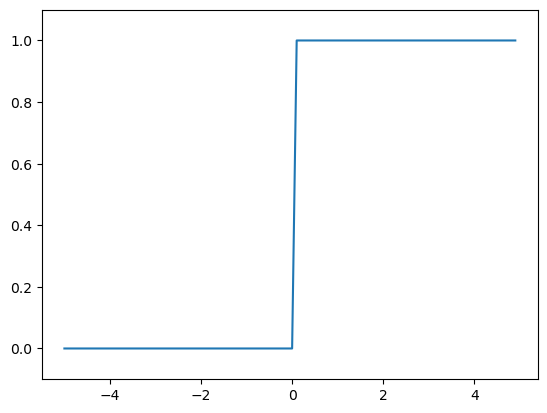

In [55]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype = int)
    
x = np.arange(-5.0,5.0,0.1)          #np.arange(start,stop,step) 函数用于生成一个从start到stop（不包括stop）的数组，步长为step。
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

2. sigmoid 函数

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

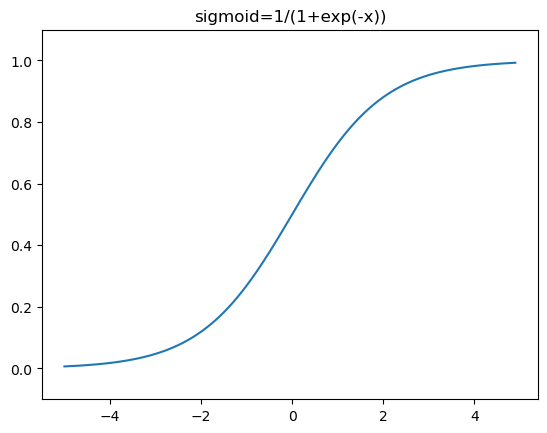

In [15]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title("sigmoid=1/(1+exp(-x))")
plt.show()

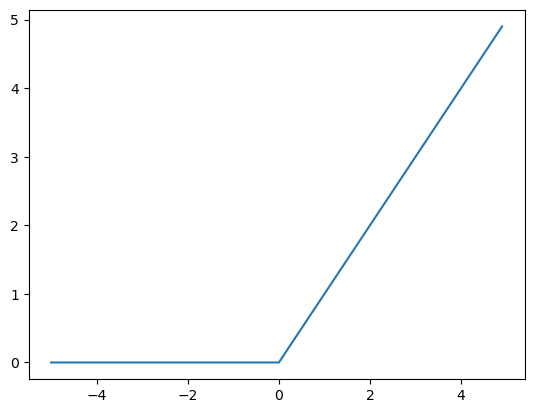

In [27]:
def relu(x):
    return np.maximum(0,x)
x = np.arange(-5.0, 5.0, 0.1)
plt.plot(x, relu(x))
plt.show()

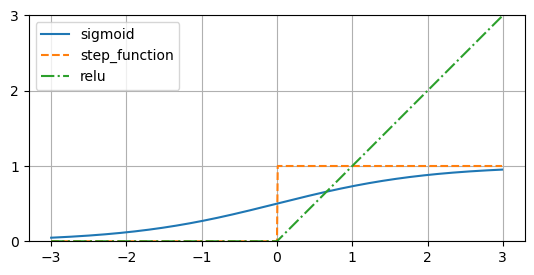

In [57]:
x = np.arange(-3.0, 3.0, 0.01)
plt.plot(x, sigmoid(x), label = "sigmoid")
plt.plot(x, step_function(x), linestyle = "--", label = "step_function")
plt.plot(x, relu(x), linestyle = "-.", label = "relu")

plt.gca().set_aspect('equal', adjustable='box')  # 设置纵横比为 1:1，确保比例协调
plt.xticks(np.arange(-3, 4, 1))  # 横坐标从 -3 到 3，间隔为 1
plt.yticks(np.arange(0, 4, 1))   # 纵坐标从 0 到 4，间隔为 1
plt.ylim(0,3)

plt.grid(True)
plt.legend()
plt.show()

- 矩阵乘法

In [58]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [60]:
B = np.array([7,8])
B.shape

(2,)

In [61]:
np.dot(A,B)

array([23, 53, 83])

- 使用Numpy多维数组，构建神经网络 page：57

In [66]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network

def identity_function(x):
    return x

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


激活函数softmax

In [68]:
def softmax(a):
    y = np.exp(a)/np.sum(np.exp(a))
    return y

In [71]:
a = np.array([1,2,3])
softmax(a)

array([0.09003057, 0.24472847, 0.66524096])

上面的softmax函数的运算有一定的缺陷。这个缺陷就是溢出问题。softmax函数的实现中要进行指数函数的运算，但是此时指数函数的值很容易变得非常大。比如，e10的值会超过20000,e100会变成一个后面有40多个0的超大值，e1000的结果会返回一个表示无穷大的inf。如果在这些超大值之间进行除法运算，结果会出现“不确定”的情况。

分子和分母上都乘上C这个任意的常数（因为同时对分母和分子乘以相同的常数，所以计算结果不变），在进行softmax的指数函数的运算时，加上（或者减去）某个常数并不会改变运算的结果。这里的C可以使用任何值，但是为了防止溢出，一般会使用输入信号中的最大值。

In [75]:
import numpy as np

In [77]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))     #softmax函数的运算

C:\Users\Luc\AppData\Local\Temp\ipykernel_24888\3382595241.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))     #softmax函数的运算
C:\Users\Luc\AppData\Local\Temp\ipykernel_24888\3382595241.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))     #softmax函数的运算


array([nan, nan, nan])

没有被正确计算，nan（not a number）

In [78]:
a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a)) 
c = np.max(a)
a - c

C:\Users\Luc\AppData\Local\Temp\ipykernel_24888\4169207718.py:2: RuntimeWarning: overflow encountered in exp
  np.exp(a) / np.sum(np.exp(a))
C:\Users\Luc\AppData\Local\Temp\ipykernel_24888\4169207718.py:2: RuntimeWarning: invalid value encountered in divide
  np.exp(a) / np.sum(np.exp(a))


array([  0, -10, -20])

In [79]:
np.exp(a - c) / np.sum(np.exp(a - c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [80]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c) # 溢出对策
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

softmax函数的特征：输出是0-1的实数，并且总和为1

In [81]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)

[0.01821127 0.24519181 0.73659691]


In [82]:
np.sum(y)

np.float64(1.0)